# 1. Executive Summary

It is often the case that dynamic pricing would yield higer revenue than constant pricing. In this lab, we perform simulation on 100 cases of customers and try different parameter values to find best combination to achieve optimal profit. 

The following is a summary of our result:

|           | P1    | P2    | l  | Profit  |
|-----------|-------|-------|----|---------|
| Constant  | \$250 |       |    | \$2,815 |
| Dynamic   | \$240 | \$305 |    | \$3,582 |
| Rationing | \$230 | \$330 | 40 | \$3,949 |

Our recommendation is to apply rationing policy since it yields the highst profit. 

# 2. Generating Customers

In [1]:
from scipy.stats import norm
from scipy.stats import uniform
import pandas as pd
import numpy as np
from statistics import mean 
np.random.seed(0)

In [2]:
#declare distribution
distLCs=norm(200,60)
distLCt=uniform(0,180)
distLCw=norm(200,80)
distBCs=norm(60,20)
distBCt=uniform(0,14)
distBCw=norm(350,120)

In [3]:
def generateCustomers():
    custLC=int(max(0,round(distLCs.rvs())))
    custBC=int(max(0,round(distBCs.rvs())))
    LCt=pd.Series(distLCt.rvs(custLC))
    LCw=pd.Series(distLCw.rvs(custLC))
    BCw=pd.Series(distBCw.rvs(custBC))
    BCt=pd.Series(distBCt.rvs(custBC))

    LC=pd.DataFrame([LCt,LCw]).transpose()
    LC.columns=['arrival_time','valuation']
    BC=pd.DataFrame([BCt,BCw]).transpose()
    BC.columns=['arrival_time','valuation']

    customerdf=pd.concat([LC,BC]).sort_values(["arrival_time"],ascending=False)
    customerdf.index=range(len(customerdf.valuation))#reindex
    return(customerdf)

In [4]:
customers=generateCustomers()

In [5]:
customers

,arrival_time,valuation
0,179.792461,270.414313
1,178.261011,168.381681
2,177.907291,144.636012
3,176.729290,239.895222
4,176.151302,241.685190
5,175.949125,230.618594
6,175.816996,190.546876
7,175.762704,95.477852
8,175.593871,176.653011
9,175.125508,10.433048


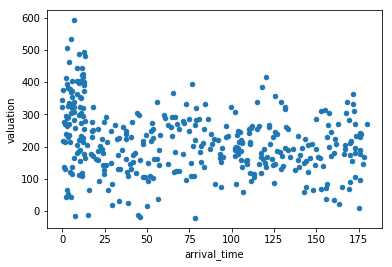

In [19]:
np.random.seed(0)
generateCustomers().plot(x='arrival_time',y='valuation',kind='scatter');

# 3. Simulating Pricing Policies

### Revenue Under Constant Pricing Policy

In [7]:
def simulateConstant(customers,seats,p):
    revenue=0
    space=seats
    for i in customers['valuation']:
        if space==0:
            break
        if i>=p: 
            space-=1
            revenue+=p
    return revenue

### Revenue Under Dynamic Pricing Policy

In [8]:
def simulateDynamic(customers,seats,p1,p2):
    space=seats
    revenue=0
    for i in range(len(customers)):
        if space==0:
            break
        if customers.arrival_time[i]<=14:
            if customers.valuation[i]>=p2: 
                space-=1
                revenue+=p2
        elif customers.valuation[i]>=p1: 
            space-=1
            revenue+=p1
    return revenue

### Revenue Under Rationing Pricing Policy

In [9]:
def simulateRationing(customers,seats,p1,p2,l):
    revenue=0
    space=seats
    for i in range(len(customers)):
        if space==0:
            break
        if space<=l:
            if customers.valuation[i]>=p2: 
                space-=1
                revenue+=p2
        elif customers.valuation[i]>=p1: 
            space-=1
            revenue+=p1
    return revenue

Check if the functions are correct.

In [10]:
data1=[[170,50],[150,40],[13,95],[12,100]]
customers=pd.DataFrame(data1,columns=['arrival_time','valuation'])
print('Constant policy with 2 seats p=50 \t:',simulateConstant(customers,2,50))
print('Constant policy with 2 seats p=100 \t:',simulateConstant(customers,2,100))
print('Dynamic policy with 3 seats p1=40, p2=95 \t:',simulateDynamic(customers,3,40,95))
print('Dynamic policy with 2 seats p1=40, p2=95 \t:',simulateDynamic(customers,2,40,95))
print('Dynamic policy with 1 seats p1=50, p2=100 \t:',simulateDynamic(customers,1,50,100))
print('Rationing policy with 3 seats p1=40, p2=100, l=1 \t:',\
simulateRationing(customers,3,40,100,1))
print('Rationing policy with 2 seats p1=40, p2=100, l=1 \t:',\
simulateRationing(customers,2,40,100,1))
print('Rationing policy with 1 seats p1=40, p2=95, l=1 \t:',\
simulateRationing(customers,1,40,95,1))

Constant policy with 2 seats p=50 	: 100
Constant policy with 2 seats p=100 	: 100
Dynamic policy with 3 seats p1=40, p2=95 	: 175
Dynamic policy with 2 seats p1=40, p2=95 	: 80
Dynamic policy with 1 seats p1=50, p2=100 	: 50
Rationing policy with 3 seats p1=40, p2=100, l=1 	: 180
Rationing policy with 2 seats p1=40, p2=100, l=1 	: 140
Rationing policy with 1 seats p1=40, p2=95, l=1 	: 95


# 4. Optimizing Parameters

In [11]:
#Seats are fixed for every senario
seats=100

In [12]:
# generate 100 samples of customers
np.random.seed(0)
customers100 = []
for i in range(100):
    customers100.append(generateCustomers())

### Optimal for Constant Pricing

Define function to look for optimal price range on constant pricing

In [13]:
def OptimalA(stepsA,pAL,pAU):  
    profit=[]
    for q in range(pAL,pAU,stepsA):
        data=[]
        for cust in customers100:
            data.append(simulateConstant(cust,seats,q))
        profit.append([q,mean(data)-20000])
    result=pd.DataFrame(profit,columns=["Price","Profit"])

    maxProfit=result['Profit'].max()
    maxID=result['Profit'].idxmax()
    maxp1=result.iloc[maxID,0]


    print("Constant price policy: best p =",maxp1,",best expected profit=",maxProfit)

This operation is rather fast, and it gives optimal price from range 200 to 300.

Optimal price is \$250 while profit is $2,815

In [14]:
OptimalA(5,200,300)

Constant price policy: best p = 250 ,best expected profit= 2815.0


### Optimal for Dynamic Pricing

Define function to look for optimal price range for dynamic pricing

In [15]:
def OptimalB(stepsB,p1BL,p1BU,p2BL,p2BU):      
    profit=[]
    for q1 in range(p1BL,p1BU,stepsB):
        for q2 in range(p2BL,p2BU,stepsB):
            data=[]
            for cust in customers100:
                data.append(simulateDynamic(cust,seats,q1,q2))
            profit.append([q1,q2,mean(data)-20000])  
    result=pd.DataFrame(profit,columns=["Price_1","Price_2","Profit"])

    maxProfit=result['Profit'].max()
    maxID=result['Profit'].idxmax()
    maxp1=result.iloc[maxID,0]
    maxp2=result.iloc[maxID,1]

    print("Constant price policy: best p1 =",maxp1,"best p2 =",maxp2,",best expected profit=",maxProfit)

We test from steps 50, 20, untill 5 and shrink range for p1 and p2.

Optimal p1 is \$240, p2 is \$305, and profit is $3,582

In [16]:
OptimalB(5,230,270,280,330)

Constant price policy: best p1 = 240 best p2 = 305 ,best expected profit= 3581.9000000000015


### Optimal for Rationing Pricing

Define function to look for optimal price and l range for rationing pricing

In [17]:
def OptimalC(stepsC,p1CL,p1CU,p2CL,p2CU,stepsl,lL,lU):
    profit=[]
    for q1 in range(p1CL,p1CU,stepsC):
        for q2 in range(p2CL,p2CU,stepsC):
            for l in range(lL,lU,stepsl):
                data=[]
                for cust in customers100:
                    data.append(simulateRationing(cust,seats,q1,q2,l))
                profit.append([q1,q2,l,mean(data)-20000])  
    result=pd.DataFrame(profit,columns=["Price_1","Price_2","l","Profit"])

    maxProfit=result['Profit'].max()
    maxID=result['Profit'].idxmax()
    maxp1=result.iloc[maxID,0]
    maxp2=result.iloc[maxID,1]
    maxl=result.iloc[maxID,2]

    print("Constant price policy: best p1 =",maxp1,"best p2 =",maxp2,"best l =",maxl,",best expected profit=",maxProfit)

Optimal p1 is \$230, p2 is \$330, l is 40, and profit is $3,949

In [18]:
OptimalC(5,200,245,300,360,1,32,45)

Constant price policy: best p1 = 230 best p2 = 330 best l = 40 ,best expected profit= 3948.7999999999993
